# 🧠 AI Developer Productivity Classification

# About Dataset
This dataset simulates the productivity of AI developers over 500 days, capturing the subtle interaction between deep work, distractions, caffeine intake, and code quality. This data blends behavioral, physiological, and productivity indicators to allow for advanced predictive modeling, regression, clustering, and time-series analysis.

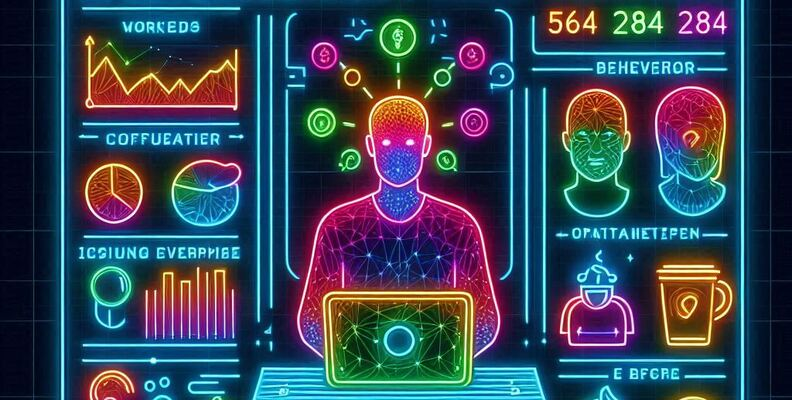

In [2]:
# importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split , cross_val_score
from sklearn.metrics import  accuracy_score, confusion_matrix , r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler ,StandardScaler

In [3]:
df=pd.read_csv(r'Data/ai_dev_productivity.csv')

In [4]:
df

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
...,...,...,...,...,...,...,...,...,...
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
# copying the orignal data frame so we can make changes to clone dataset
tempdf=df.copy()

In [8]:
tempdf

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
...,...,...,...,...,...,...,...,...,...
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0


# Exploratory Data Analysis

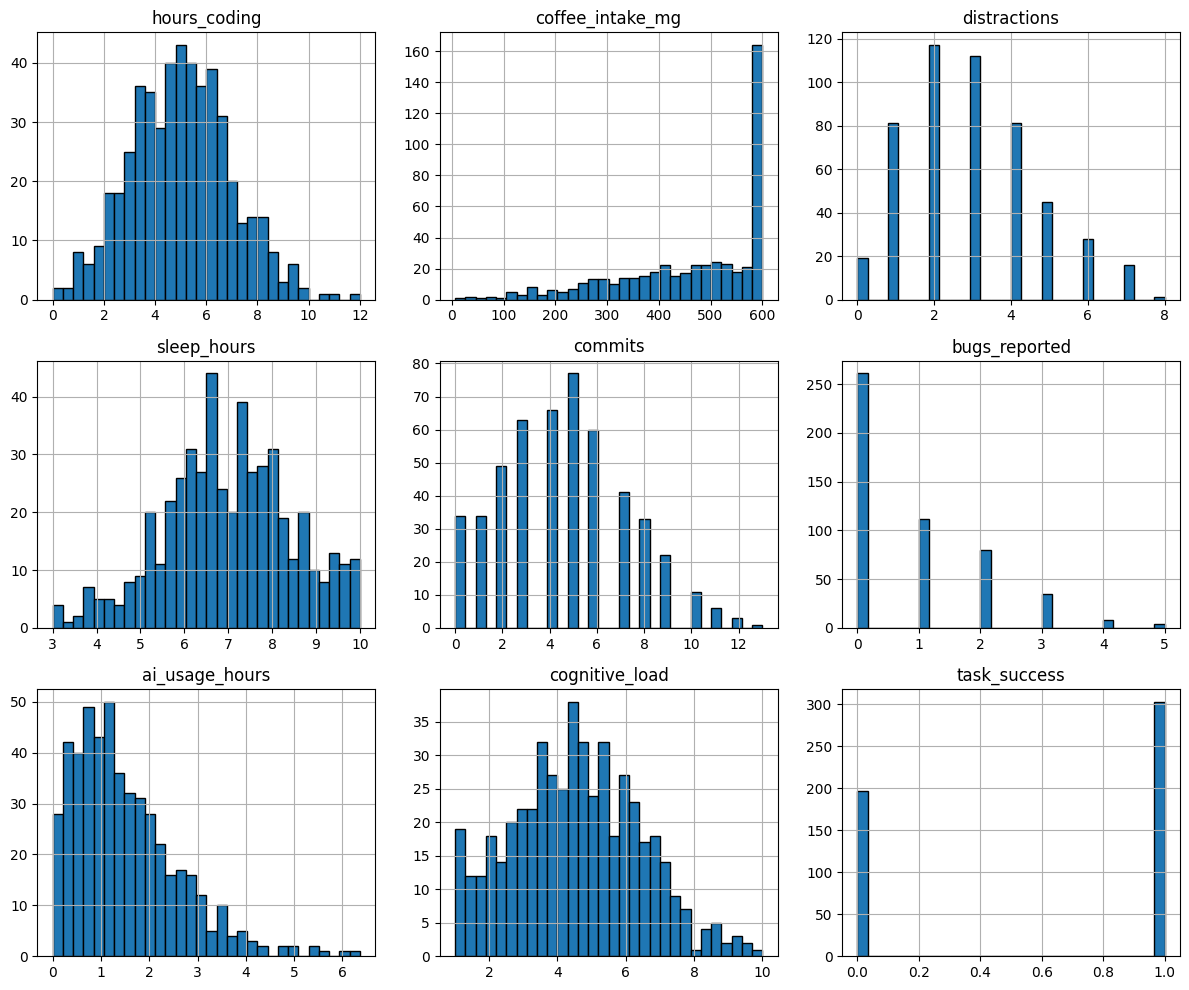

In [9]:
tempdf.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

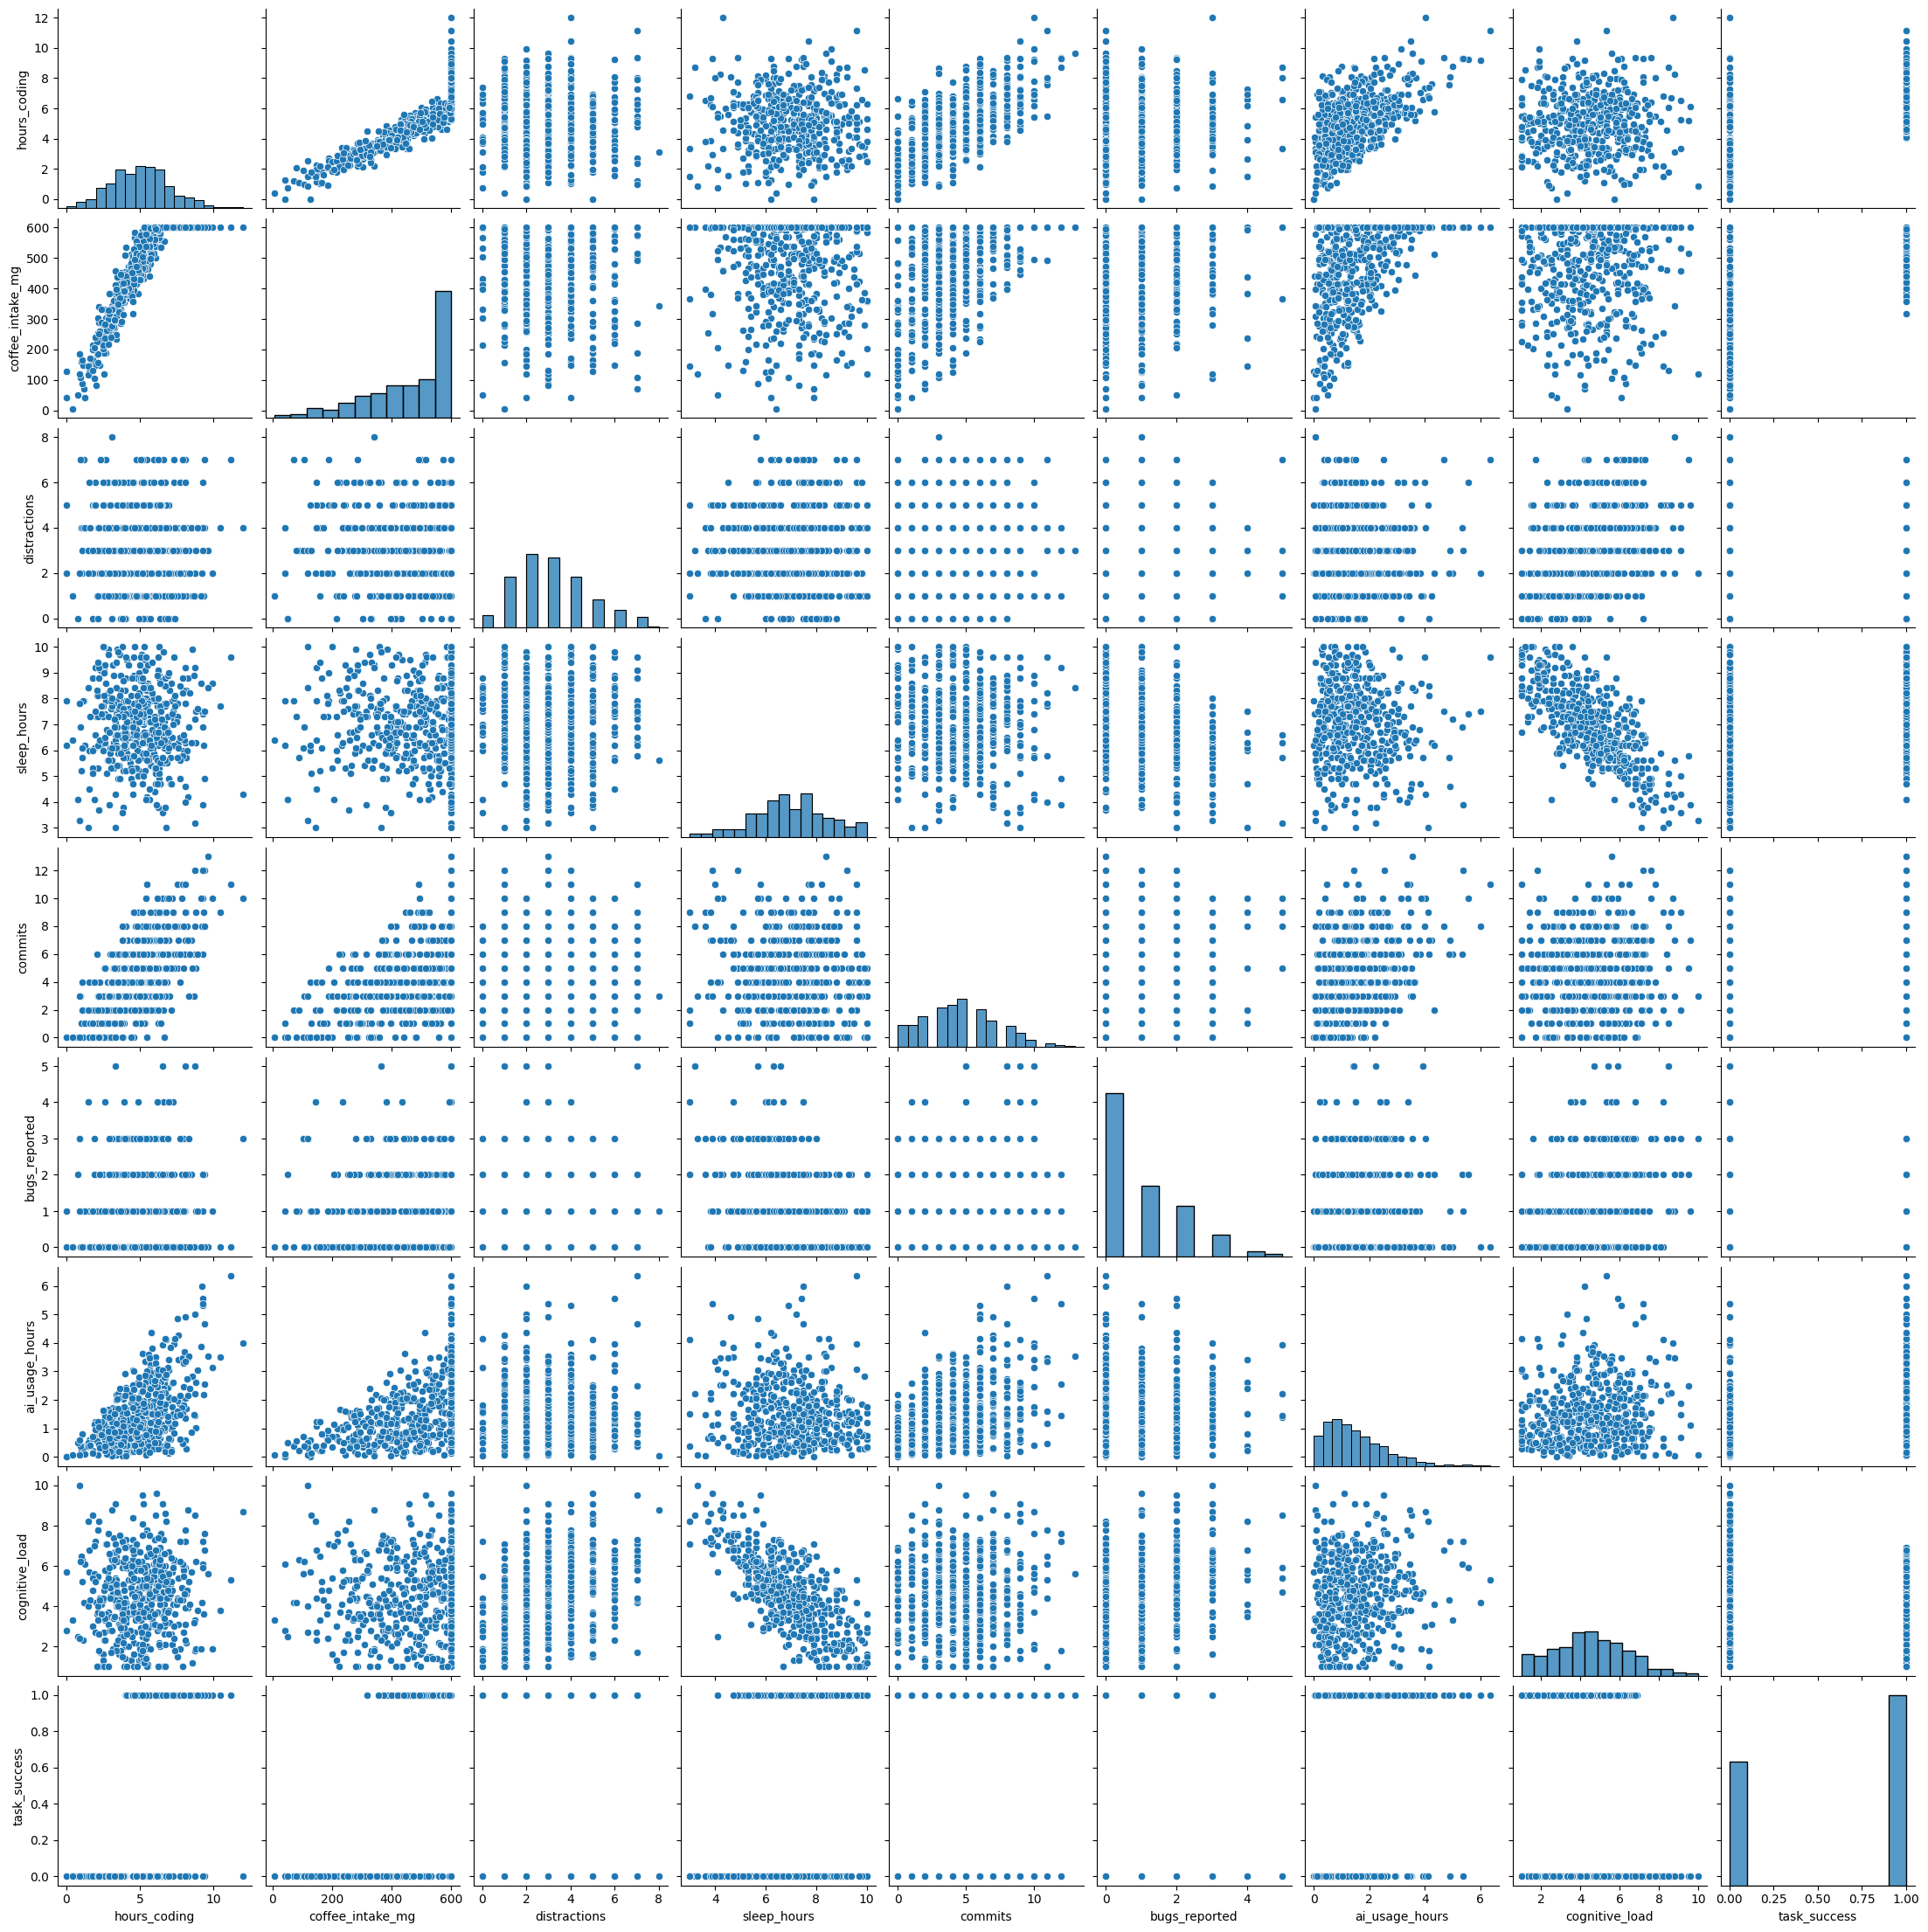

In [10]:
sns.pairplot(data=tempdf)

<Axes: xlabel='hours_coding'>

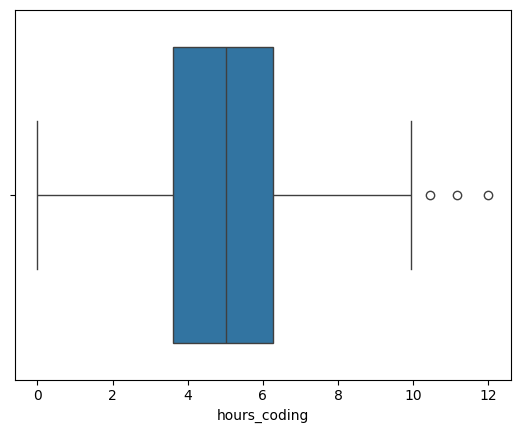

In [11]:
sns.boxplot(data=tempdf,x='hours_coding')

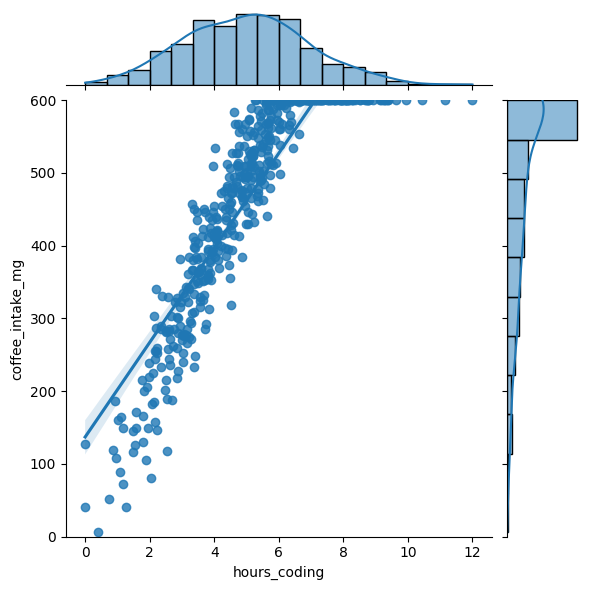

In [12]:
sns.jointplot(x='hours_coding',y='coffee_intake_mg',kind='reg',data=tempdf,ylim=(0,600))

<Axes: xlabel='coffee_intake_mg', ylabel='Count'>

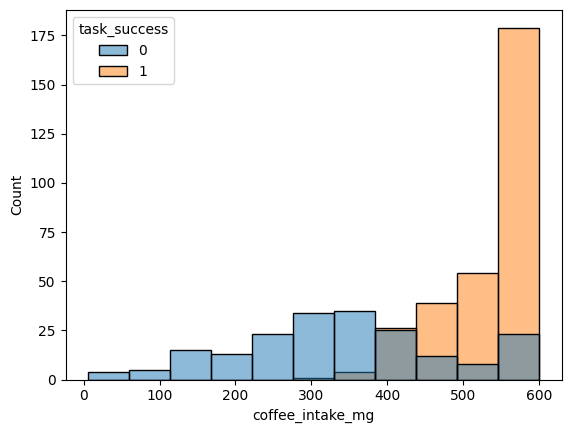

In [13]:
sns.histplot(x='coffee_intake_mg',data=tempdf,hue='task_success')

Text(0.5, 1.0, 'Task Success distribution')

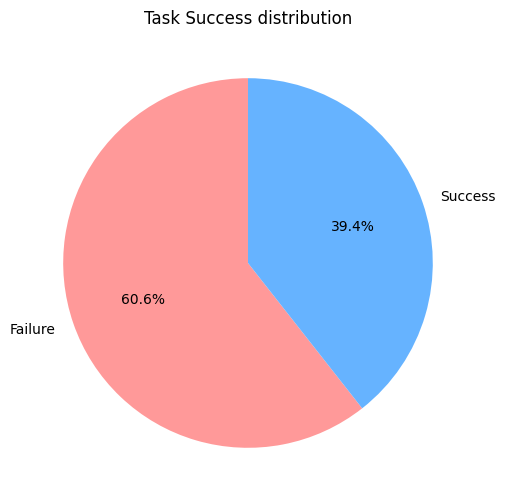

In [14]:
task_success_counts = tempdf['task_success'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(task_success_counts, labels=['Failure', 'Success'],
autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Task Success distribution")

<Axes: >

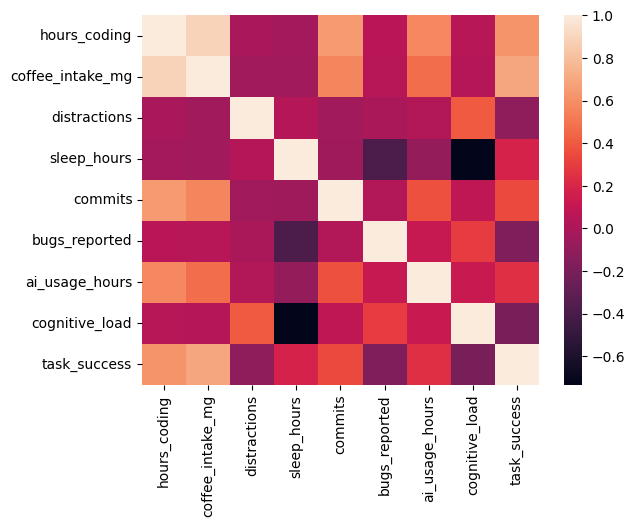

In [15]:
sns.heatmap(tempdf.corr())

# Preprocessing And Model Training 

In [16]:
X=tempdf.drop(columns='task_success')
y=tempdf['task_success']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=14)

In [18]:
X_train

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load
306,7.56,600,4,7.8,11,0,1.60,4.4
110,1.16,149,4,7.9,0,1,0.32,2.3
475,4.50,356,6,6.2,6,2,1.73,6.8
254,1.96,149,5,9.2,0,0,1.24,2.7
91,6.94,600,5,6.6,7,0,1.99,6.6
...,...,...,...,...,...,...,...,...
327,6.58,600,2,9.8,6,0,1.85,1.0
406,2.86,218,3,5.6,3,2,0.99,7.6
268,4.12,381,2,5.9,4,3,0.40,2.8
344,4.06,414,1,5.7,5,0,0.84,6.4


In [19]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier

In [20]:
# trying (LOR) as a model
model=LogisticRegression()

In [21]:
model.fit(X_train,y_train)

c:\Users\wajah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred=model.predict(X_test)

In [23]:
print("model accuracy :- ",accuracy_score(y_test,y_pred)*100)

model accuracy :-  87.33333333333333


<Axes: >

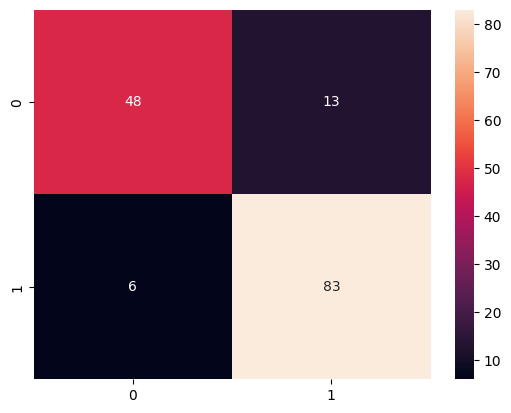

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# Model Improvement

In [ ]:

# seprating scaling features
scaling_features=tempdf.drop(columns='task_success')

In [37]:
# column transformation for preprocessing
preprocessor=ColumnTransformer([
    ('Scaling_Features',StandardScaler(),scaling_features.columns)
])
# after trying different model (DT) has given the best result,s
model=DecisionTreeClassifier()

In [ ]:
# making pipeline
pipe=Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)
])

In [28]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Scaling_Features',
                                                  StandardScaler(),
                                                  Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [29]:
y_pred=pipe.predict(X_test)

In [33]:
print("R2_score :- ",r2_score(y_test,y_pred)*100)

R2_score :-  100.0


In [34]:
cv_scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
average_accuracy = np.mean(cv_scores) * 100
print("Average cross-validation accuracy: {:.2f}%".format(average_accuracy))

Average cross-validation accuracy: 99.14%


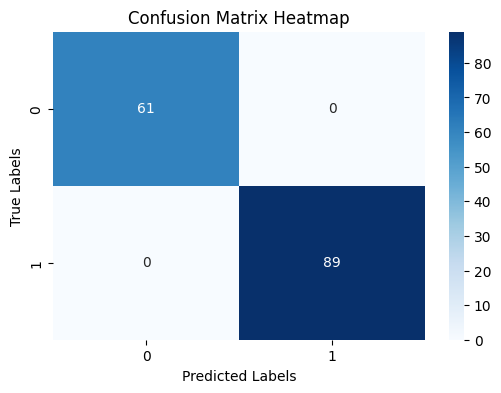

In [35]:
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# saving trained pipeline using (pickle) for reuse or deployment

In [36]:
import pickle
with open('AI_dev_productivity.pkl', 'wb') as f:
    pickle.dump(pipe, f)